In [ ]:
from typing import List

import matplotlib.pyplot as plt
from torchvision import io, transforms
from torchvision.utils import Image, ImageDraw
from torchvision.transforms.functional import to_pil_image

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

Mounted at /content/gdrive/


In [ ]:
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']

In [ ]:
import os
train_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/train_images/2016/')
train_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/train_masks/2016/')

val_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/val_images/2016/')
val_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/val_masks/2016/')

man_img_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/man_images/2016/')
man_mask_list_2016 = os.listdir('gdrive/MyDrive/UNET/1024_patches/man_masks/2016/')

train_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/train_images/2019/')
train_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/train_masks/2019/')

val_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/val_images/2019/')
val_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/val_masks/2019/')

man_img_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/man_images/2019/')
man_mask_list_2019= os.listdir('gdrive/MyDrive/UNET/1024_patches/man_masks/2019/')

list_train_files = []

for i in train_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/train_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/train_masks/2016/"+i)
  list_train_files.append(tuple_obj)

for i in train_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/train_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/train_masks/2019/"+i)
  list_train_files.append(tuple_obj)

list_val_files = []

for i in val_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i)
  list_val_files.append(tuple_obj)

for i in val_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i)
  list_val_files.append(tuple_obj)

list_man_files = []

for i in man_img_list_2016:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2016/'+i, "gdrive/MyDrive/UNET/1024_patches/man_masks/2016/"+i)
  list_man_files.append(tuple_obj)

for i in man_img_list_2019:
  tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/man_images/2019/'+i, "gdrive/MyDrive/UNET/1024_patches/man_masks/2019/"+i)
  list_man_files.append(tuple_obj)

In [ ]:
print(len(list_train_files))
print(len(list_val_files))
print(len(list_man_files))

6400
1600
192


In [ ]:
#!pip install patchify
IMG_SIZE = 256
PATCH_SIZE = 256
import cv2
from torch.utils.data import Dataset
from torch.utils.data import Dataset as BaseDataset
import numpy as np
from tensorflow.keras.utils import to_categorical
#from patchify import patchify
class ImageData(Dataset):
    def __init__(self, files: List[str],preprocessing=None, augmentation=None):
        self.files = files
        self.resize = transforms.Resize((IMG_SIZE, IMG_SIZE))
        self.num_patches = PATCH_SIZE * PATCH_SIZE
        self.preprocessing = preprocessing
        self.augmentation = augmentation

    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, i):
        image = np.load(self.files[i][0]).astype('uint8')
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = np.load(self.files[i][1])

        mask = mask[:,:,0]
        #image = cv2.resize(image,(256,256))
        #mask = cv2.resize(mask, (256,256))
        mask = np.expand_dims(mask, axis = 2)
        mask = to_categorical(mask, num_classes = 3)
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']

        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        return (image, mask)

In [ ]:
train_dataset = ImageData(list_train_files)
val_dataset = ImageData(list_val_files)

In [ ]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()

(array([1, 2]), array([63930,  1606]))


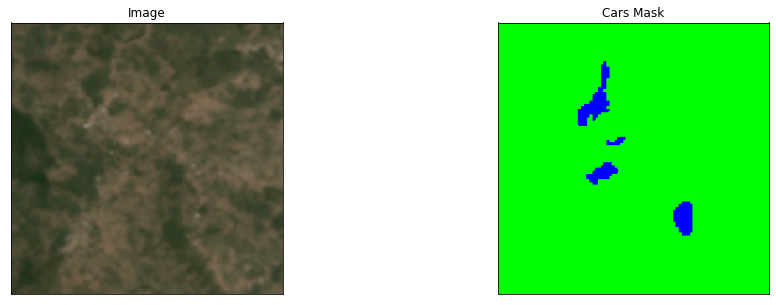

In [ ]:
image, mask = val_dataset[57] # get some sample
print(np.unique(np.argmax(mask, axis =2), return_counts=True))
visualize(
    image=image, 
    cars_mask=mask.squeeze(),
)

In [ ]:
import albumentations as albu
def get_training_augmentation():
    train_transform = [

        albu.HorizontalFlip(p=0.5),

        albu.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        albu.PadIfNeeded(min_height=320, min_width=320, always_apply=True, border_mode=0),
        albu.RandomCrop(height=320, width=320, always_apply=True),

        albu.IAAAdditiveGaussianNoise(p=0.2),
        albu.IAAPerspective(p=0.5),

        albu.OneOf(
            [
                albu.CLAHE(p=1),
                albu.RandomBrightness(p=1),
                albu.RandomGamma(p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.IAASharpen(p=1),
                albu.Blur(blur_limit=3, p=1),
                albu.MotionBlur(blur_limit=3, p=1),
            ],
            p=0.9,
        ),

        albu.OneOf(
            [
                albu.RandomContrast(p=1),
                albu.HueSaturationValue(p=1),
            ],
            p=0.9,
        ),
    ]
    return albu.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        albu.PadIfNeeded(384, 480)
    ]
    return albu.Compose(test_transform)


def to_tensor(x, **kwargs):
    #print(x.shape)
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

In [ ]:
!pip install segmentation_models_pytorch
import segmentation_models_pytorch as smp
import torch
ENCODER = 'resnet34'
ENCODER_WEIGHTS = None
CLASSES = ['water','trees','land']
ACTIVATION = None # could be None for logits or 'softmax2d' for multiclass segmentation
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# create segmentation model with pretrained encoder

model = smp.Unet(
    encoder_name=ENCODER,
    encoder_depth=3, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(CLASSES),
    decoder_channels=(128, 64, 64), 
    activation=ACTIVATION)

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, Dataset
train_dataset = ImageData(list_train_files, preprocessing=get_preprocessing(preprocessing_fn))
val_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=8)
valid_loader = DataLoader(val_dataset, batch_size=32, shuffle=True, num_workers=4)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 4, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
import segmentation_models_pytorch.utils.metrics
weights = torch.FloatTensor([.40,0.10,0.50])
loss = smp.utils.losses.CrossEntropyLoss(weight = weights)
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.001),
])
#optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, amsgrad=True)

In [ ]:
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [ ]:
max_score = 0

for i in range(0, 5):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # do something (save model, change lr, etc.)
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(model, 'gdrive/MyDrive/UNET/1024_patches/best_model_full_img.pth')
        print('Model saved!')
        
    if i == 3:
        optimizer.param_groups[0]['lr'] = 1e-3
        print('Decrease decoder learning rate to 1e-5!')

##RESULTS


In [ ]:
#torch.save(model, 'gdrive/MyDrive/UNET/256_patches/best_model.pth')
import torch
best_model = torch.load('gdrive/MyDrive/UNET/1024_patches/best_model_full_img.pth')

1014


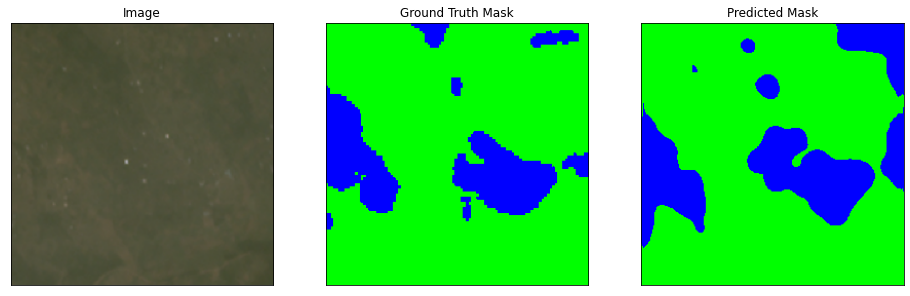

85


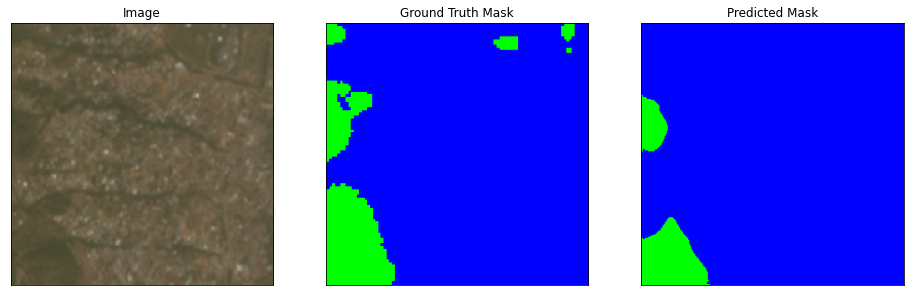

665


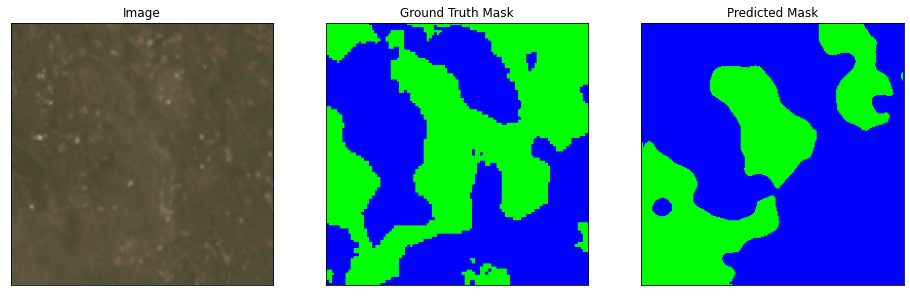

1191


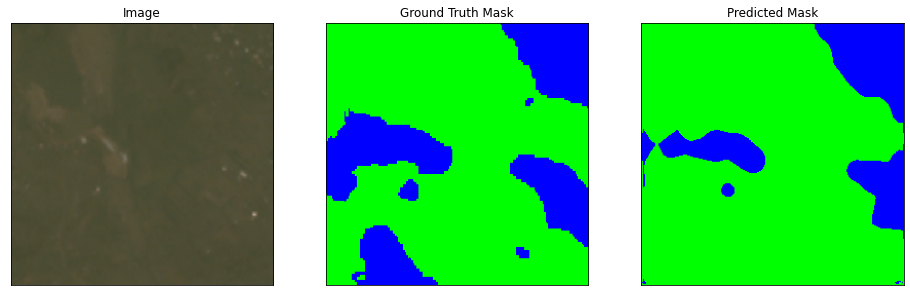

690


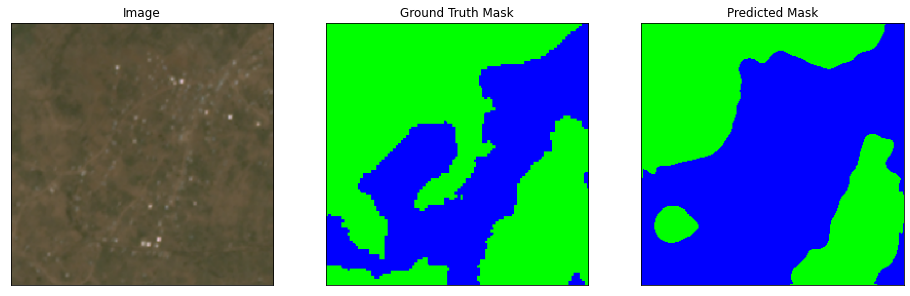

In [ ]:
test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
test_dataset_vis = ImageData(list_val_files)

for i in range(5):
    n = np.random.choice(len(test_dataset))
    print(n)
    image_vis = test_dataset_vis[n][0].astype('uint8')
    #image_vis = cv2.cvtColor(image_vis, cv2.COLOR_RGB2BGR)
    image, gt_mask = test_dataset[n]
    gt_mask = test_dataset_vis[n][1]
    gt_mask = gt_mask.squeeze()


    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
    #pr_mask = np.transpose(pr_mask, (1,2,0))
    pr_mask = np.argmax(pr_mask, axis = 0)
    pr_mask = to_categorical(pr_mask, num_classes = 3)
    #print(np.unique(pr_mask, return_counts = True))
        
    visualize(
        image=image_vis, 
        ground_truth_mask=gt_mask, 
        predicted_mask=pr_mask
    )

In [ ]:
import tensorflow as tf
test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
test_dataset_vis = ImageData(list_val_files)


precision_list_land = []
recall_list_land = []
iou_score_land = []

precision_list_trees = []
recall_list_trees = []
iou_score_trees = []

precision_list_water = []
recall_list_water = []
iou_score_water = []

precision_list_weighted = []
recall_list_weighted = []

accuracy_overall = []
iou_overall = []
id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}

for i in range(len(test_dataset)):
    n = i
    print(n)
    #image_vis = test_dataset_vis[n][0].astype('uint8')
    #image_vis = cv2.cvtColor(image_vis, cv2.COLOR_RGB2BGR)
    image, gt_mask = test_dataset[n]
    gt_mask = test_dataset_vis[n][1]
    gt_mask = gt_mask.squeeze()
    
    gt_mask = np.argmax(gt_mask, axis = 2)
    
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    pr_mask = best_model.predict(x_tensor)
    pr_mask = (pr_mask.squeeze().cpu().numpy().round())
    #pr_mask = np.transpose(pr_mask, (1,2,0))
    pr_mask = np.argmax(pr_mask, axis = 0)
    #pr_mask = to_categorical(pr_mask, num_classes = 3)
    
    uniq_gt = np.unique(gt_mask)
    uniq_pr = np.unique(pr_mask)

    uniq_inter = np.union1d(uniq_gt, uniq_pr)
    uniq_inter = np.unique(uniq_inter)

    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
    m.update_state(gt_mask,pr_mask)
    iou_overall.append(m.result().numpy())

    for k in uniq_inter:
      m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
      m.update_state(gt_mask,pr_mask)
      id_dict[k].append(m.result().numpy())

In [ ]:
from statistics import mean
print("Average IoU Trees:", mean(iou_score_trees)*100)
print("Average IoU Land:", mean(iou_score_land)*100)
print("Average IoU Water:", mean(iou_score_water)*100)
print("Average IoU Overall:", mean(iou_overall)*100)

Average IoU Trees: 80.42020201683044
Average IoU Land: 47.096967697143555
Average IoU Water: 6.978168338537216
Average IoU Overall: 57.334089279174805


In [ ]:
from tensorflow.python.ops.array_ops import broadcast_args
train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']


precision_list_land = []
recall_list_land = []
iou_score_land = []

precision_list_trees = []
recall_list_trees = []
iou_score_trees = []

precision_list_water = []
recall_list_water = []
iou_score_water = []

precision_list_weighted = []
recall_list_weighted = []

accuracy_overall = []
iou_overall = []
id_dict = {0: iou_score_water, 1: iou_score_trees, 2: iou_score_land}
full_gt_mask_list = []
full_pr_mask_list = []

for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_list.append(full_gt_mask)
  full_pr_mask_list.append(full_pr_mask)
  
  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_pr_mask)
  iou_overall.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_pr_mask)
    id_dict[k].append(m.result().numpy())

In [ ]:
for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_list.append(full_gt_mask)
  full_pr_mask_list.append(full_pr_mask)

  uniq_gt = np.unique(full_gt_mask)
  uniq_pr = np.unique(full_pr_mask)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
    
  m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=list(uniq_inter))
  m.update_state(full_gt_mask,full_pr_mask)
  iou_overall.append(m.result().numpy())

  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=3, target_class_ids=[k])
    m.update_state(full_gt_mask,full_pr_mask)
    id_dict[k].append(m.result().numpy())

In [ ]:
from statistics import mean
print("Average IoU Trees:", mean(iou_score_trees)*100)
print("Average IoU Land:", mean(iou_score_land)*100)
print("Average IoU Water:", mean(iou_score_water)*100)
print("Average IoU Overall:", mean(iou_overall)*100)

Average IoU Trees: 82.06910490989685
Average IoU Land: 54.48469519615173
Average IoU Water: 10.268203169107437
Average IoU Overall: 51.828551292419434


89


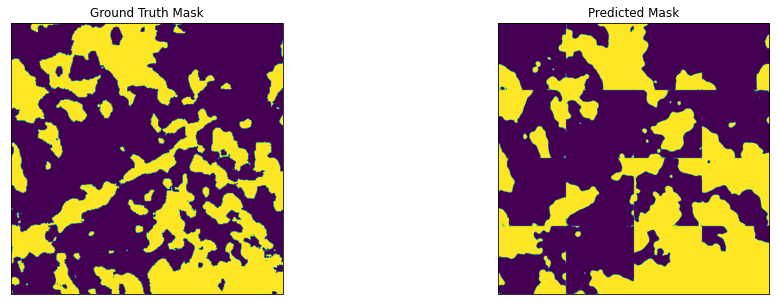

80


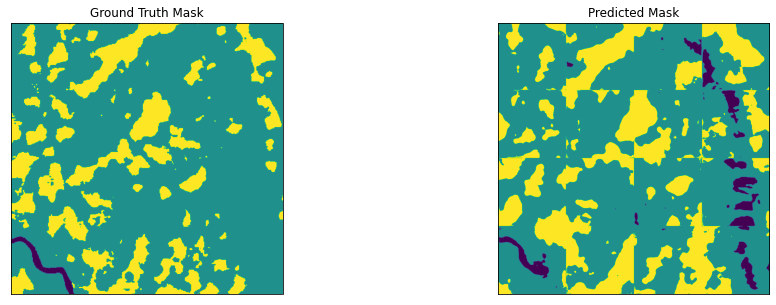

11


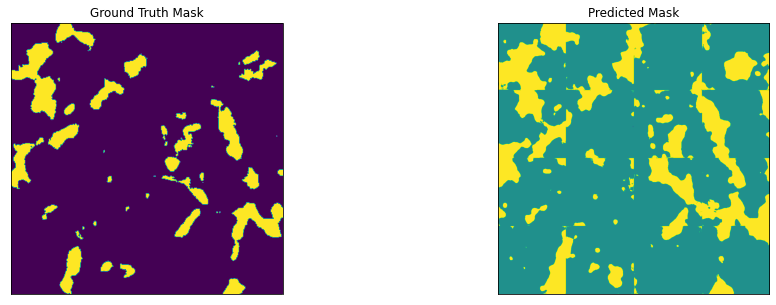

17


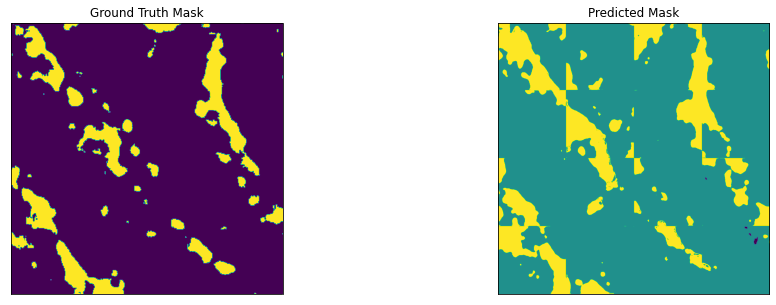

28


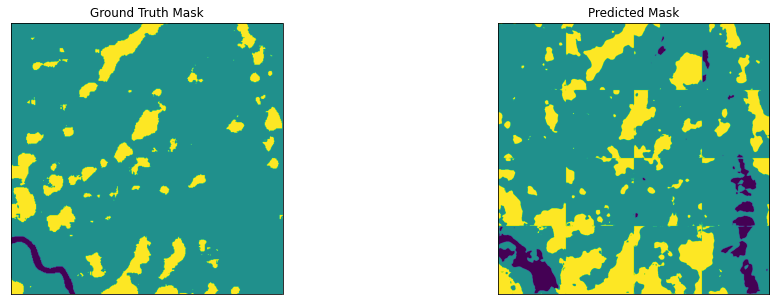

In [ ]:
for i in range(5):
    n = np.random.choice(len(full_gt_mask_list))
    print(n)
    ground_truth_mask = full_gt_mask_list[n]
    predicted_mask = full_pr_mask_list[n]
    visualize( 
        ground_truth_mask=ground_truth_mask.squeeze(), 
        predicted_mask=predicted_mask.squeeze()
    )

In [ ]:
#PRECISION AND RECALL CALCULATION 2016
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.python.ops.array_ops import broadcast_args

test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
test_dataset_vis = ImageData(list_val_files)


train_ind = ['0_0', '0_2', '0_3', '0_4', '0_5', '0_6', '0_7', '0_8', '0_10', '0_11', '0_13', '0_14', '1_0', '1_1', '1_2', '1_3', '1_5', '1_8', '1_10', '1_11', '1_12', '1_13', '1_15', '2_0', '2_2', '2_4', '2_5', '2_6', '2_7', '2_8', '2_9', '2_10', '2_11', '2_12', '2_13', '2_15', '3_1', '3_2', '3_4', '3_5', '3_7', '3_8', '3_9', '3_10', '3_11', '3_12', '3_13', '3_14', '3_15', '4_0', '4_1', '4_2', '4_3', '4_4', '4_6', '4_8', '4_10', '4_12', '4_13', '4_14', '4_15', '5_0', '5_1', '5_3', '5_5', '5_6', '5_7', '5_8', '5_9', '5_11', '5_12', '5_15', '6_0', '6_1', '6_2', '6_4', '6_5', '6_6', '6_7', '6_9', '6_10', '6_12', '6_14', '6_15', '7_1', '7_3', '7_4', '7_5', '7_6', '7_7', '7_8', '7_9', '7_11', '7_13', '8_0', '8_1', '8_2', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '8_12', '8_14', '8_15', '9_0', '9_3', '9_4', '9_5', '9_6', '9_8', '9_10', '9_11', '9_12', '9_13', '9_14', '9_15', '10_1', '10_2', '10_3', '10_5', '10_9', '10_10', '10_11', '10_12', '10_13', '10_14', '10_15', '11_0', '11_1', '11_3', '11_4', '11_5', '11_6', '11_7', '11_8', '11_9', '11_10', '11_11', '11_12', '11_13', '11_14', '12_0', '12_1', '12_3', '12_4', '12_5', '12_6', '12_7', '12_8', '12_9', '12_10', '12_11', '12_12', '12_13', '12_14', '12_15', '13_0', '13_1', '13_2', '13_3', '13_4', '13_5', '13_6', '13_7', '13_9', '13_10', '13_11', '13_12', '13_14', '13_15', '14_0', '14_1', '14_2', '14_3', '14_4', '14_5', '14_6', '14_7', '14_9', '14_10', '14_11', '14_13', '14_14', '14_15', '15_1', '15_2', '15_3', '15_4', '15_5', '15_6', '15_7', '15_10', '15_12', '15_13', '15_14', '15_15']
val_ind = ['9_9','0_15','14_12','0_1','2_14','6_8','1_14','0_9','1_4','1_6','1_7','1_9','10_0','10_4','10_6','10_8','11_15','11_2','13_13','13_8','14_8','15_0','15_11','15_8','15_9','2_3','3_0','3_3','3_6','3_6','4_11','4_7','4_9','5_10','5_13','5_14','5_2','5_4','6_11','6_13','6_3','7_0','7_10','7_2','8_13','8_3','9_1','9_2','9_7','7_12','7_14']
manual_ind = ['0_12','2_1','4_5','7_15','10_7', '12_2']


precision_list_land = []
recall_list_land = []

precision_list_trees = []
recall_list_trees = []

precision_list_water = []
recall_list_water = []

accuracy_overall = []


for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  

  full_gt_mask_1d = np.reshape(full_gt_mask, (1024*1024))
  full_pr_mask_1d = np.reshape(full_pr_mask, (1024*1024))

  report = classification_report(full_gt_mask_1d, full_pr_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water.append(report['0']['recall'])
  except:
    pass

  accuracy_overall.append(report['accuracy'])


In [ ]:
#PRECISION AND RECALL CALCULATION 2019:
for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_1d = np.reshape(full_gt_mask, (1024*1024))
  full_pr_mask_1d = np.reshape(full_pr_mask, (1024*1024))

  report = classification_report(full_gt_mask_1d, full_pr_mask_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_trees.append(report['1']['precision'])
  except:
    pass
  try:
    precision_list_water.append(report['0']['precision'])
  except:
    pass


  try:
    recall_list_land.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_trees.append(report['1']['recall'])
  except:
    pass
  try:
    recall_list_water.append(report['0']['recall'])
  except:
    pass

  accuracy_overall.append(report['accuracy'])


In [ ]:
from statistics import mean
print("Average Impervios Precision:", mean(precision_list_land)*100)
print("Average Impervios Recall:", mean(recall_list_land)*100)
print("Average Tree Canopy Precision:", mean(precision_list_trees)*100)
print("Average Tree Canopy Recall:", mean(recall_list_trees)*100)
print("Average Water Precision:", mean(precision_list_water)*100)
print("Average Water Recall:", mean(recall_list_water)*100)
print("Average Accuracy:", mean(accuracy_overall)*100)

Average Impervios Precision: 62.8693179295018
Average Impervios Recall: 80.79584947382216
Average Tree Canopy Precision: 94.41114373794423
Average Tree Canopy Recall: 86.44677056735324
Average Water Precision: 15.420846199168883
Average Water Recall: 16.46714678280802
Average Accuracy: 86.30747982099945


In [ ]:
import tensorflow as tf
iou_tree_loss = []
iou_tree_gain = []
iou_land_loss = []
iou_land_gain = []
iou_water_loss = []
iou_water_gain = []
iou_no_change = []
iou_overall_loss = []
iou_overall_gain = []

id_dict_loss = {0:iou_no_change, 1: iou_water_loss, 2: iou_tree_loss, 3: iou_land_loss}
id_dict_gain = {0:iou_no_change, 1: iou_water_gain, 2: iou_tree_gain, 3: iou_land_gain}


for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask_2016[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2016[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      
      #print(a,b)
      full_gt_mask_2019[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2019[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256


  full_gt_mask_2016 = full_gt_mask_2016 + 1
  full_gt_mask_2019 = full_gt_mask_2019 + 1
  full_pr_mask_2016 = full_pr_mask_2016 + 1
  full_pr_mask_2019 = full_pr_mask_2019 + 1

  sub_true = full_gt_mask_2019 + (-1)*full_gt_mask_2016
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2016.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2019.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()

  sub_pred = full_pr_mask_2019 + (-1)*full_pr_mask_2016
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  
  uniq_gt = np.unique(modified_image_2016_true)
  uniq_pr = np.unique(modified_image_2016_pred)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))

  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2016_true,modified_image_2016_pred)
  iou_overall_loss.append(m.result().numpy())
  
  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2016_true,modified_image_2016_pred)
    id_dict_loss[k].append(m.result().numpy())


  uniq_gt = np.unique(modified_image_2019_true)
  uniq_pr = np.unique(modified_image_2019_pred)

  uniq_inter = np.union1d(uniq_gt, uniq_pr)
  uniq_inter = np.unique(uniq_inter)
  uniq_inter = np.delete(uniq_inter, np.where(uniq_inter == 0))
  m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=list(uniq_inter))
  m.update_state(modified_image_2019_true,modified_image_2019_pred)
  iou_overall_gain.append(m.result().numpy())
  for k in uniq_inter:
    m = tf.keras.metrics.IoU(num_classes=4, target_class_ids=[k])
    m.update_state(modified_image_2019_true,modified_image_2019_pred)
    id_dict_gain[k].append(m.result().numpy())

In [ ]:
from statistics import mean
print("Average IoU Land Loss:", mean(iou_land_loss)*100)
print("Average IoU Water Loss:", mean(iou_water_loss)*100)
print("Average IoU Tree Loss:", mean(iou_tree_loss)*100)
print("Average IoU Land Gain:", mean(iou_land_gain)*100)
print("Average IoU Water Gain:", mean(iou_water_gain)*100)
print("Average IoU Tree Gain:", mean(iou_tree_gain)*100)
print("Average IoU Overall Loss:", mean(iou_overall_loss)*100)
print("Average IoU overall Gain:", mean(iou_overall_gain)*100)

Average IoU Land Loss: 2.4982724338769913
Average IoU Water Loss: 0.9954916313290596
Average IoU Tree Loss: 20.786835253238678
Average IoU Land Gain: 21.22623771429062
Average IoU Water Gain: 1.4692261815071106
Average IoU Tree Gain: 2.1552003920078278
Average IoU Overall Loss: 8.29191580414772
Average IoU overall Gain: 9.245176613330841


In [ ]:
#PRECISION AND RECALL CALCULATION FOR LANDCOVER CHANGE
from sklearn.metrics import classification_report
precision_list_land_loss = []
recall_list_land_loss = []

precision_list_trees_loss = []
recall_list_trees_loss = []

precision_list_water_loss = []
recall_list_water_loss = []

accuracy_overall_loss = []

precision_list_land_gain = []
recall_list_land_gain = []

precision_list_trees_gain = []
recall_list_trees_gain = []

precision_list_water_gain = []
recall_list_water_gain = []

accuracy_overall_gain = []



for i in val_ind:
  #full_image = np.zeros((1024,1024,3))
  full_gt_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2016 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2016/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2016/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      #pr_mask = to_categorical(pr_mask, num_classes = 3)
      #pr_mask = np.expand_dims(pr_mask, axis = 2)

      #print(a,b)
      full_gt_mask_2016[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2016[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256
  
  full_gt_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  full_pr_mask_2019 = np.zeros((1024,1024,1), dtype = 'int16')
  
  
  a = 0
  b = 0
  for j in range(4):
    for k in range(4): 
      #print(j,k)
      list_val_files = []
      tuple_obj = ('gdrive/MyDrive/UNET/1024_patches/val_images/2019/'+i+'_'+str(j)+str(k)+'.npy', 
                   "gdrive/MyDrive/UNET/1024_patches/val_masks/2019/"+i+'_'+str(j)+str(k)+'.npy')
      list_val_files.append(tuple_obj)
      test_dataset = ImageData(list_val_files, preprocessing=get_preprocessing(preprocessing_fn))
      test_dataset_vis = ImageData(list_val_files)

      image, gt_mask = test_dataset[0]
      gt_mask = test_dataset_vis[0][1]
      gt_mask = gt_mask.squeeze()

      gt_mask = np.argmax(gt_mask, axis = 2)
      
      x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
      pr_mask = best_model.predict(x_tensor)
      pr_mask = (pr_mask.squeeze().cpu().numpy().round())
      #pr_mask = np.transpose(pr_mask, (1,2,0))
      pr_mask = np.argmax(pr_mask, axis = 0)
      
      #print(a,b)
      full_gt_mask_2019[a: a+256,b:b+256,0] =  gt_mask
      full_pr_mask_2019[a: a+256,b:b+256,0] =  pr_mask
      
      b = b + 256
    b = 0
    a = a + 256


  full_gt_mask_2016 = full_gt_mask_2016 + 1
  full_gt_mask_2019 = full_gt_mask_2019 + 1
  full_pr_mask_2016 = full_pr_mask_2016 + 1
  full_pr_mask_2019 = full_pr_mask_2019 + 1

  sub_true = full_gt_mask_2019 + (-1)*full_gt_mask_2016
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2016.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2016_true = sub_true.copy()
  
  sub_true[np.where(np.abs(sub_true)>0)] = full_gt_mask_2019.astype('int16')[np.where(np.abs(sub_true)>0)]
  modified_image_2019_true = sub_true.copy()

  sub_pred = full_pr_mask_2019 + (-1)*full_pr_mask_2016
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2016.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2016_pred = sub_pred.copy()
  
  sub_pred[np.where(np.abs(sub_pred)>0)] = full_pr_mask_2019.astype('int16')[np.where(np.abs(sub_pred)>0)]
  modified_image_2019_pred = sub_pred.copy()

  modified_image_2016_true_1d = np.reshape(modified_image_2016_true, (1024*1024))
  modified_image_2016_pred_1d = np.reshape(modified_image_2016_pred, (1024*1024))

  report = classification_report(modified_image_2016_true_1d, modified_image_2016_pred_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land_loss.append(report['3']['precision'])
  except:
    pass
  try:
    precision_list_trees_loss.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_water_loss.append(report['1']['precision'])
  except:
    pass


  try:
    recall_list_land_loss.append(report['3']['recall'])
  except:
    pass
  try:
    recall_list_trees_loss.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_water_loss.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_loss.append(report['accuracy'])

  modified_image_2019_true_1d = np.reshape(modified_image_2019_true, (1024*1024))
  modified_image_2019_pred_1d = np.reshape(modified_image_2019_pred, (1024*1024))

  report = classification_report(modified_image_2019_true_1d, modified_image_2019_pred_1d, output_dict=True)
  #print(report)
  try:
    precision_list_land_gain.append(report['3']['precision'])
  except:
    pass
  try:
    precision_list_trees_gain.append(report['2']['precision'])
  except:
    pass
  try:
    precision_list_water_gain.append(report['1']['precision'])
  except:
    pass


  try:
    recall_list_land_gain.append(report['3']['recall'])
  except:
    pass
  try:
    recall_list_trees_gain.append(report['2']['recall'])
  except:
    pass
  try:
    recall_list_water_gain.append(report['1']['recall'])
  except:
    pass

  accuracy_overall_gain.append(report['accuracy'])

In [ ]:
from statistics import mean
print("Average Precision Land loss:", mean(precision_list_land_loss)*100)
print("Average Precision Water loss:", mean(precision_list_water_loss)*100)
print("Average Precision Trees loss:", mean(precision_list_trees_loss)*100)
print("Average Recall Land loss:", mean(recall_list_land_loss)*100)
print("Average Recall Water loss:", mean(recall_list_water_loss)*100)
print("Average Recall Trees loss:", mean(recall_list_trees_loss)*100)
print("Average Accuracy Overall loss:", mean(accuracy_overall_loss)*100)

Average Precision Land loss: 3.4826619707459683
Average Precision Water loss: 1.3247642440637208
Average Precision Trees loss: 40.52073605701526
Average Recall Land loss: 18.329673172319357
Average Recall Water loss: 8.91302051113664
Average Recall Trees loss: 33.109173650471234
Average Accuracy Overall loss: 80.87997623518402


In [ ]:
print("Average Precision Land gain:", mean(precision_list_land_gain)*100)
print("Average Precision Water gain:", mean(precision_list_water_gain)*100)
print("Average Precision Trees gain:", mean(precision_list_trees_gain)*100)
print("Average Recall Land gain:", mean(recall_list_land_gain)*100)
print("Average Recall Water gain:", mean(recall_list_water_gain)*100)
print("Average Recall Trees gain:", mean(recall_list_trees_gain)*100)
print("Average Accuracy Overall gain:", mean(accuracy_overall_gain)*100)

Average Precision Land gain: 41.805916410833944
Average Precision Water gain: 2.072200485756013
Average Precision Trees gain: 2.626565597869158
Average Recall Land gain: 33.069961619795926
Average Recall Water gain: 3.3552868765165167
Average Recall Trees gain: 18.0110939126165
Average Accuracy Overall gain: 80.87973314173081
